In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output("C:\Local\hassans\Data\FF\train.csv").decode("utf8"))

# Any results you write to the current directory are saved as output.

# **Know your data**

### Step 1. Import libraries

### Step 2. Import datasets

### Step 3. Analysis the data

In [1]:
#Load data
# Holiday events metadata

import pandas as pd
original_data = pd.read_csv('C:/Local/hassans/Data/FF/train/train.csv')

original_data.head()


C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [2]:
# indexing with dates and save as year train data
original_data = original_data.set_index('date')


In [7]:
start_date = '2017-01-01'
end_date = '2017-12-31'
filename = 'train_2017.csv'
original_data.loc[start_date:end_date].to_csv(filename, index = False)

In [17]:
store_data = original_data.groupby(['store_nbr'])
store_nbr_1 = store_data.get_group(1)
store_nbr_1.to_csv('store_nbr_1.csv')

In [ ]:
del original_data

In [24]:
for i in range(54,55):
    store_nbr = store_data.get_group(i)
    file_name = 'store_nbr_' + str(i) + '.csv'
    store_nbr.to_csv(file_name, index = False)

In [5]:
store_nbr = pd.read_csv('store_nbr_1.csv')
store_nbr.head()
items_meta_data = pd.read_csv('items.csv')
items_meta_data.head()

C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


Populating the interactive namespace from numpy and matplotlib


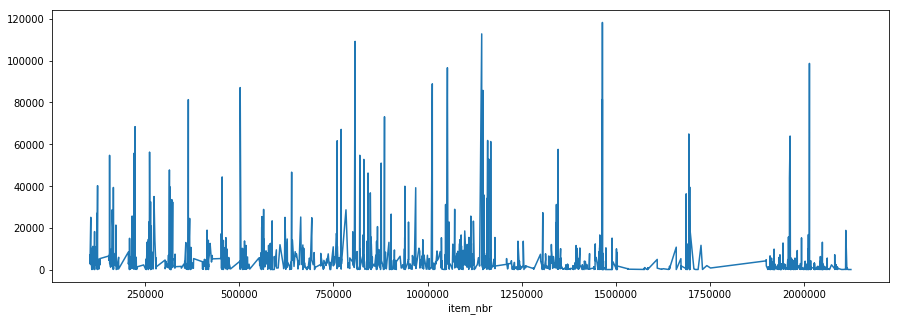

In [37]:
%pylab inline
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
store_nbr.shape # (1648867, 6)
store_nbr['item_nbr'].unique().shape # (2600,) # In store 54, 2600 items are sold
store_nbr_54_group_by_item_nbr = store_nbr.groupby(['item_nbr'])
store_nbr_54_group_by_item_nbr['unit_sales'].sum().plot()

In [7]:
train_data_items = store_nbr.set_index('item_nbr').join(items_meta_data.set_index('item_nbr')) 
train_data_items.shape # (1648867, 8)
train_data_items
train_data_items_group_by_family = train_data_items.groupby(['family'])
print(train_data_items_group_by_family.count())


                                id    date  store_nbr  unit_sales  \
family                                                              
AUTOMOTIVE                    3898    3898       3898        3898   
BEAUTY                        2855    2855       2855        2855   
BEVERAGES                   360188  360188     360188      360188   
BOOKS                          128     128        128         128   
BREAD/BAKERY                101343  101343     101343      101343   
CELEBRATION                   7850    7850       7850        7850   
CLEANING                    299096  299096     299096      299096   
DAIRY                       209756  209756     209756      209756   
DELI                         71122   71122      71122       71122   
EGGS                         42271   42271      42271       42271   
FROZEN FOODS                 37712   37712      37712       37712   
GROCERY I                   878262  878262     878262      878262   
GROCERY II                    7415

Populating the interactive namespace from numpy and matplotlib
family
GROCERY I    3.743823e+06
BEVERAGES    2.673769e+06
PRODUCE      2.443330e+06
CLEANING     1.078525e+06
DAIRY        1.054354e+06
Name: unit_sales, dtype: float64


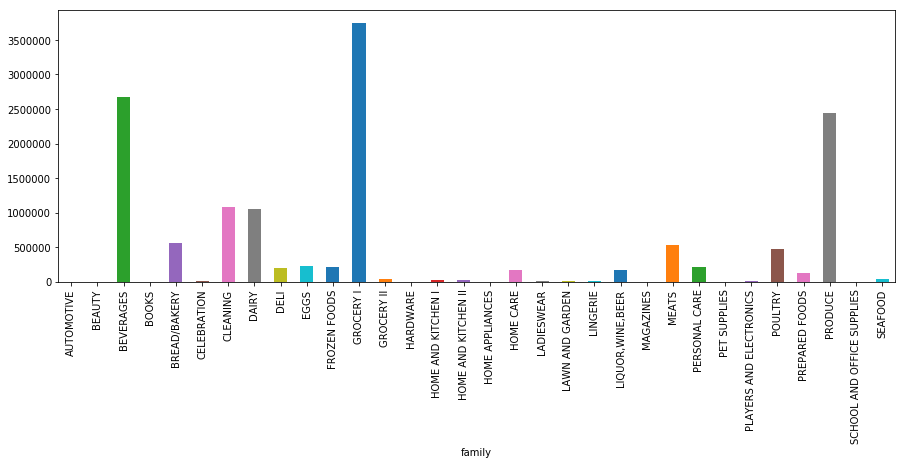

In [17]:
%pylab inline
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
total_store_items = train_data_items_group_by_family['unit_sales'].sum()
print(total_store_items.nlargest(5))
total_store_items.plot(kind = 'bar')

In [66]:
grocery_I = train_data_items_group_by_family.get_group('GROCERY I')
print(grocery_I.shape)
#grocery_I.plot( x = 'date', y = 'unit_sales')
grocery_I

(667970, 8)


,id,date,store_nbr,unit_sales,onpromotion,family,class,perishable
item_nbr,,,,,,,,
103520,121835,2013-01-04,54,3.0,NaN,GROCERY I,1028,0
103520,164325,2013-01-05,54,8.0,NaN,GROCERY I,1028,0
103520,206181,2013-01-06,54,4.0,NaN,GROCERY I,1028,0
103520,245538,2013-01-07,54,6.0,NaN,GROCERY I,1028,0
103520,284705,2013-01-08,54,1.0,NaN,GROCERY I,1028,0
103520,323743,2013-01-09,54,2.0,NaN,GROCERY I,1028,0
103520,362089,2013-01-10,54,3.0,NaN,GROCERY I,1028,0
103520,443460,2013-01-12,54,1.0,NaN,GROCERY I,1028,0
103520,485555,2013-01-13,54,1.0,NaN,GROCERY I,1028,0


(1679, 8)


,id,date,store_nbr,unit_sales,onpromotion,family,class,perishable
week_days,,,,,,,,
Friday,225480,225480,225480,225480,183017,225480,225480,225480
Monday,238717,238717,238717,238717,194247,238717,238717,238717
Saturday,253083,253083,253083,253083,205832,253083,253083,253083
Sunday,261605,261605,261605,261605,212331,261605,261605,261605
Thursday,218054,218054,218054,218054,176437,218054,218054,218054
Tuesday,232397,232397,232397,232397,190050,232397,232397,232397
Wednesday,219531,219531,219531,219531,180014,219531,219531,219531


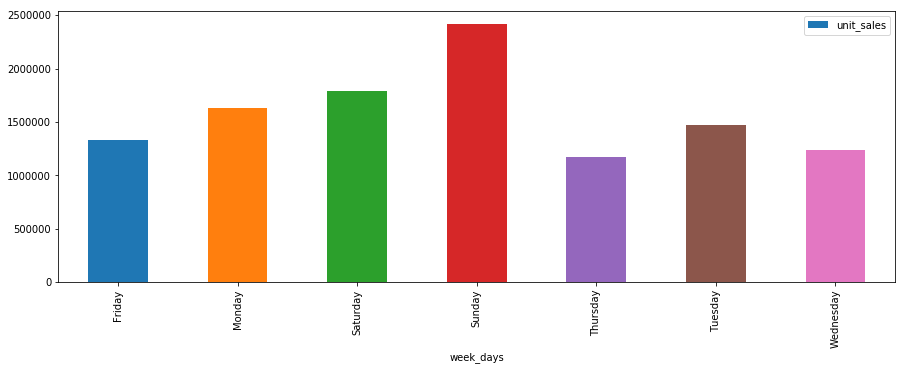

In [91]:
#train_data_items_group_by_family_class_items = train_data_items.groupby(['family', 'class', 'item_nbr'])
#train_data_items_group_by_family_class_items['unit_sales'].sum().plot()
train_data_items_group_by_family_class_items = train_data_items.groupby(['date'])
print(train_data_items_group_by_family_class_items.count().shape)

train_data_items['date'] = pd.to_datetime(train_data_items['date'])
train_data_items['week_days'] = train_data_items['date'].dt.weekday_name
train_data_items.groupby(['week_days']).sum().plot(y = 'unit_sales', kind = 'bar')
train_data_items.groupby(['week_days']).count()


In [21]:
i = 1
file_name = 'store_nbr_' + str(i)
file_name

'store_nbr_1'

In [24]:
for i in range(1,55):
    file_name = 'store_nbr_' + str(i) + '.csv' # create filename
    store_nbr = pd.read_csv(file_name) # load store transactions
    
    train_data_items = store_nbr.set_index('item_nbr').join(items_meta_data.set_index('item_nbr')) # join with item
    train_data_items_group_by_family = train_data_items.groupby(['family']) # groupby family
    
    total_store_items = train_data_items_group_by_family['unit_sales'].sum()
    print('At store: ' + str(i))
    print(total_store_items.nlargest(10)) # print top 5 items in that store


C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


At store: 1
family
GROCERY I       3.743823e+06
BEVERAGES       2.673769e+06
PRODUCE         2.443330e+06
CLEANING        1.078525e+06
DAIRY           1.054354e+06
BREAD/BAKERY    5.699922e+05
MEATS           5.276083e+05
POULTRY         4.786214e+05
EGGS            2.365060e+05
FROZEN FOODS    2.179264e+05
Name: unit_sales, dtype: float64
At store: 2
family
GROCERY I        6.590999e+06
BEVERAGES        4.153912e+06
PRODUCE          2.781594e+06
CLEANING         1.625869e+06
DAIRY            1.436860e+06
BREAD/BAKERY     9.242728e+05
MEATS            8.499158e+05
POULTRY          8.194404e+05
PERSONAL CARE    4.413380e+05
DELI             4.114851e+05
Name: unit_sales, dtype: float64
At store: 3
family
GROCERY I        1.297047e+07
BEVERAGES        1.135159e+07
PRODUCE          8.613316e+06
CLEANING         3.474432e+06
DAIRY            3.436852e+06
BREAD/BAKERY     1.937379e+06
POULTRY          1.905239e+06
MEATS            1.366489e+06
EGGS             8.799810e+05
PERSONAL CARE    

In [31]:
#train_data_items_group_by_family.sum()

for i in range(1,55):
    file_name = 'store_nbr_' + str(i) + '.csv' # create filename
    store_nbr = pd.read_csv(file_name) # load store transactions
    
    store_nbr_2017 = store_nbr.set_index('date').loc['2017-01-01': '2017-12-31']
    train_data_items = store_nbr_2017.set_index('item_nbr').join(items_meta_data.set_index('item_nbr')) # join with item
    train_data_items_group_by_family = train_data_items.groupby(['family']) # groupby family
    
    total_store_items = train_data_items_group_by_family['unit_sales'].sum()
    print('At store: ' + str(i))
    print(total_store_items.nlargest(10)) # print top 5 items in that store


C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


At store: 1
family
GROCERY I        593466.000
PRODUCE          568984.217
BEVERAGES        493224.000
DAIRY            164751.000
CLEANING         150354.000
BREAD/BAKERY      83002.291
POULTRY           72024.792
MEATS             70933.224
HOME CARE         39572.000
PERSONAL CARE     33855.000
Name: unit_sales, dtype: float64
At store: 2
family
GROCERY I        984349.000
BEVERAGES        766617.000
PRODUCE          605144.001
CLEANING         224078.000
DAIRY            221573.000
BREAD/BAKERY     159979.545
MEATS            126066.610
POULTRY          117721.955
PERSONAL CARE     64943.000
HOME CARE         64851.000
Name: unit_sales, dtype: float64
At store: 3
family
BEVERAGES        2152132.000
GROCERY I        1994516.000
PRODUCE          1928026.208
DAIRY             548162.000
CLEANING          492721.000
BREAD/BAKERY      311539.989
POULTRY           283301.724
MEATS             191631.882
PERSONAL CARE     131074.000
HOME CARE         124991.000
Name: unit_sales, dtype: fl

In [30]:
store_nbr.set_index('date').loc['2017-01-01': '2017-12-31']


,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2017-01-02,101803224,54,103501,9.0,False
2017-01-02,101803225,54,105576,43.0,False
2017-01-02,101803226,54,105693,14.0,False
2017-01-02,101803227,54,105857,1.0,False
2017-01-02,101803228,54,106716,4.0,False
2017-01-02,101803229,54,108786,9.0,False
2017-01-02,101803230,54,108797,5.0,False
2017-01-02,101803231,54,108833,2.0,True
2017-01-02,101803232,54,108952,3.0,False


In [18]:
del store_nbr_1
del original_data

In [10]:
# read the train
import pandas as pd
store_nbr =  pd.read_csv('store_nbr_54.csv')
store_nbr.shape # (2562153, 6) 2553963
store_nbr.groupby(['date']).count()


C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-02,606,606,606,606,0
2013-01-03,611,611,611,611,0
2013-01-04,568,568,568,568,0
2013-01-05,612,612,612,612,0
2013-01-06,629,629,629,629,0
2013-01-07,572,572,572,572,0
2013-01-08,536,536,536,536,0
2013-01-09,533,533,533,533,0
2013-01-10,546,546,546,546,0


## Load meta data

In [ ]:

# Load data
# Oil meta data
oil_meta_data = pd.read_csv('../input/oil.csv')
print(oil_meta_data.head())
print('shape: ', oil_meta_data.shape)

In [ ]:
oil_meta_data['dcoilwtico'].plot()

In [ ]:
%pylab inline
#import matplotlib
#matplotlib.style.use('ggplot')

import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
oil_data = pd.read_csv('../input/oil.csv', parse_dates = ['date'], dayfirst=True, index_col='date')
oil_data['dcoilwtico'].plot()


In [ ]:
oils = oil_data[['dcoilwtico']]

oils[:5]



In [ ]:
oils.index # index by date
oils.index.day # index by day
oils.index.weekday # index by weekday

In [ ]:
oils['weekday'] = oils.index.weekday
oils[:5]

In [ ]:
weekday_counts = oils.groupby('weekday').aggregate(sum)
print(weekday_counts)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_counts


In [ ]:


weekday_counts.plot(kind='bar')



In [34]:
# Items meta data
import pandas as pd
items_meta_data = pd.read_csv('items.csv')
print(items_meta_data.head())
print('shape: ', items_meta_data.shape)

   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1
shape:  (4100, 4)


In [35]:
items_meta_data['item_nbr'].unique().shape

(4100,)

In [ ]:
items_meta_data['class'].unique().shape

In [ ]:
print(items_meta_data['family'].unique().shape)
items_family = items_meta_data.groupby('family')
items_class = items_meta_data.groupby('class')
items_family_class = items_meta_data.groupby(['family', 'class'])
print(items_family.count())
print(items_class.count())
print(items_family_class.count())

In [ ]:
%pylab inline
#import matplotlib
#matplotlib.style.use('ggplot')

import pandas as pd
pd.set_option('display.mpl_style', 'default') 
figsize(15, 5)
items_family['item_nbr'].count().plot(kind = 'bar')


In [ ]:
items_class['item_nbr'].count().plot(kind = 'bar')


In [ ]:
items_family_class['item_nbr'].count().plot(kind = 'bar')

In [ ]:
items_meta_data.groupby(['perishable', 'family', 'class']).count()

In [ ]:
items_perishable_family = items_meta_data.groupby(['perishable', 'family'])
items_perishable_family.count()

In [ ]:
items_perishable_family['item_nbr'].count().plot(kind = 'bar')

In [ ]:
items_meta_data.groupby(['class', 'family']).count()

In [ ]:
transactions_data = pd.read_csv('../input/transactions.csv')
print(transactions_data.head())
transactions_data['date'].unique()


In [ ]:
# Transactions meta data
transactions_meta_data = pd.read_csv('../input/transactions.csv', parse_dates = ['date'], dayfirst=True, index_col='date')
print(transactions_meta_data[1:10])
print('shape: ', transactions_meta_data.shape)
transactions_meta_data.plot()
store_nbr = transactions_meta_data['store_nbr'].unique()
print(store_nbr.shape)
store_nbr



In [ ]:
# group by by store_nbr
group_by_store_nbr = transactions_meta_data.groupby('store_nbr')
#print(group_by_store_nbr)
group_by_store_nbr.sum().plot(kind='bar')
#print(group_by_store_nbr.sum())

Most transactions occur in Quito, Pichincha (the capital of Ecuador) 


In [ ]:
transactions_meta_data['store_nbr'].unique().shape

In [ ]:
start_date = '2013-01-01'
end_date   = '2013-12-31'
transactions_2013 = transactions_meta_data.loc[start_date : end_date]
group_by_store_nbr_2013 = transactions_2013.groupby('store_nbr')

start_date = '2014-01-01'
end_date   = '2014-12-31'
transactions_2014 = transactions_meta_data.loc[start_date : end_date]
group_by_store_nbr_2014 = transactions_2014.groupby('store_nbr')

start_date = '2015-01-01'
end_date   = '2015-12-31'
transactions_2015 = transactions_meta_data.loc[start_date : end_date]
group_by_store_nbr_2015 = transactions_2015.groupby('store_nbr')

start_date = '2016-01-01'
end_date   = '2016-12-31'
transactions_2016 = transactions_meta_data.loc[start_date : end_date]
group_by_store_nbr_2016 = transactions_2016.groupby('store_nbr')

start_date = '2017-01-01'
end_date   = '2017-12-31'
transactions_2017 = transactions_meta_data.loc[start_date : end_date]
group_by_store_nbr_2017 = transactions_2017.groupby('store_nbr')

# plot
fig, ax = subplots()
group_by_store_nbr_2013.sum().plot(kind = 'bar', color = 'k', ax = ax)
group_by_store_nbr_2014.sum().plot(kind = 'bar', color = 'DarkGreen', ax = ax)
group_by_store_nbr_2015.sum().plot(kind = 'bar', color = 'DarkBlue', ax = ax)
group_by_store_nbr_2016.sum().plot(kind = 'bar', color = 'DarkOrange', ax = ax)
group_by_store_nbr_2017.sum().plot(kind = 'bar', color = 'Gray', ax = ax)
ax.legend (['Year 2013', 'Year 2014', 'Year 2015', 'Year 2016', 'Year 2017'])


In [ ]:
transactions_at_store_44_year_2013 = group_by_store_nbr_2013.get_group(44)
transactions_at_store_44_year_2013['weekday'] = transactions_at_store_44_year_2013.index.weekday
weekday_counts = transactions_at_store_44_year_2013.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'WEDNESDAY', 'Thursday', 'Friday', 'Saturday',
                        'Sunday']
weekday_counts.plot(kind = 'bar')

In [ ]:
# check the status of the one store for example the whole year
# store_nbr = 1
transactions_at_store_1_year_2013 = group_by_store_nbr_2014.get_group(1)
#print(transactions_at_store_1_2013)
#transactions_at_store_1_2013.plot(kind = 'bar')
transactions_at_store_1_year_2013['weekday'] = transactions_at_store_1_year_2013.index.weekday
weekday_counts = transactions_at_store_1_year_2013.groupby('weekday').aggregate(sum)
print(weekday_counts)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                        'Sunday']
weekday_counts
weekday_counts.plot(kind='bar')

In [ ]:
# transactions and oils price 
p1 = oil_data['dcoilwtico'].plot()
transactions_meta_data['transactions'].plot(ax = p1, style = '.')

In [ ]:
# Load stores meta data
stores_meta_data = pd.read_csv('../input/stores.csv')
print(stores_meta_data.head())
print('shape: ', stores_meta_data.shape)
print(stores_meta_data)


In [ ]:
cities_states = stores_meta_data.groupby(['state', 'city'])
print(cities_states.count())

In [ ]:
# Load data
# train data
#train_data = pd.read_csv('../input/train.csv', nrows=100)
#print(train_data.head())
#print('shape: ', train_data.shape)

In [ ]:
# Shape of the train data
%pylab inline
#import matplotlib
#matplotlib.style.use('ggplot')

import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

train_data = pd.read_csv('../input/train.csv', nrows = 1000, parse_dates = ['date'], dayfirst = True, index_col = 'date')
print('shape: ', train_data.shape) # (125497040,6)
store_item_groupby = train_data.groupby(['store_nbr', 'item_nbr'])

#figsize(15, 5)
store_item_groupby['unit_sales'].sum().plot( kind = 'bar')


In [ ]:
import pandas as pd

# read the train data
# parse the data based on year
# delete the variable after saving to csv file
#train_data_reader = pd.read_csv('../input/train.csv', 
 #                              parse_dates = ['date'], dayfirst = True, index_col = 'date')

#train_data_reader = pd.read_csv('../input/train.csv',  
#                               parse_dates = ['date'], dayfirst = True, index_col = 'date')
# 2013
#start_date = '2013-01-01'
#end_date = '2013-01-31'
#filename = 'train_2013.csv'
#train_data_2013 = train_data_reader.loc[start_date:end_date]
#train_data_2013.to_csv(filename)
#del train_data_2013



In [ ]:

# 2014
#start_date = '2014-01-01'
#end_date = '2014-12-31'
#filename = 'train_2014.csv'
#train_data_2014 = train_data_reader.loc[start_date:end_date]
#train_data_2014.to_csv(filename)
#del train_data_2014

# 2015
#start_date = '2015-01-01'
#end_date = '2015-12-31'
#filename = 'train_2015.csv'
#train_data_2015 = train_data_reader.loc[start_date:end_date]
#train_data_2015.to_csv(filename)
#del train_data_2015


# 2016
#start_date = '2016-01-01'
#end_date = '2016-12-31'
#filename = 'train_2016.csv'
#train_data_2016 = train_data_reader.loc[start_date:end_date]
#train_data_2016.to_csv(filename)
#del train_data_2016
# 2017
#start_date = '2017-01-01'
#end_date = '2017-12-31'
#filename = 'train_2017.csv'
#train_data_2017 = train_data_reader.loc[start_date:end_date]
#train_data_2017.to_csv(filename)
#del train_data_2017
#del train_data_reader






#for train_data in train_data_reader:
 #   print(train_data)


#print('shape: ', train_data.shape) # (125497040,6)
#train_data_reader.get_chunk(125497040)

#store_groupby = train_data.groupby([ 'store_nbr'])

#figsize(15, 5)
#store_groupby['unit_sales'].count().plot()


In [ ]:
#import pandas as pd
#train_1000 = pd.read_csv('train_1000.csv')
#print(train_1000)
# shape of the test data
#test_data = pd.read_csv('../input/test.csv')
#print('shape: ', test_data.shape) # (3370464,5)
#print(test_data.head(5)) 

In [ ]:
import os.path
os.path.exists('train_2013.csv')

In [ ]:
%pylab inline
#import matplotlib
#matplotlib.style.use('ggplot')

import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
train_data = pd.read_csv('../input/train.csv', parse_dates = ['date'], dayfirst=True, index_col='date')
# 2013
start_date = '2013-01-01'
end_date = '2013-01-31'
train_data_2013 = train_data.loc[start_date:end_date]
train_data_2013['unit_sales'].plot()


In [ ]:
start_date = '2013-02-01'
end_date = '2013-02-28'
train_data_2013 = train_data.loc[start_date:end_date]
train_data_2013['unit_sales'].plot()

In [ ]:
start_date = '2013-03-01'
end_date = '2013-03-31'
train_data_2013 = train_data.loc[start_date:end_date]
train_data_2013['unit_sales'].transpose().plot()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

start_date = '2013-01-01'
end_date = '2013-01-31'
train_data_2013 = train_data.loc[start_date:end_date]

train_data_2013['unit_sales'].plot(ax = axes[0])
axes[0].set_title('2013')

start_date = '2014-01-01'
end_date = '2014-01-31'
train_data_2014 = train_data.loc[start_date:end_date]
train_data_2014['unit_sales'].plot(ax = axes[1])
axes[1].set_title('2014')

In [ ]:
original_data

In [12]:
train_data = pd.read_csv('train_2016.csv')
train_data.head()


,id,store_nbr,item_nbr,unit_sales,onpromotion
0,66458908,25,105574,12.0,False
1,66458909,25,105575,9.0,False
2,66458910,25,105857,3.0,False
3,66458911,25,108634,3.0,False
4,66458912,25,108701,2.0,True


In [13]:
train_data.shape

(35229871, 5)

In [14]:
train_data['store_nbr'].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54], dtype=int64)

In [15]:
train_data['store_nbr'].unique().shape

(53,)

In [16]:
store_item_groups = train_data.groupby(['store_nbr', 'item_nbr'])

In [23]:
unit_sales = store_item_groups['unit_sales'].mean()

In [24]:
unit_sales.head()

store_nbr  item_nbr
1          99197        2.151515
           103520       2.768421
           103665       3.722807
           105574       5.645455
           105575      10.107735
Name: unit_sales, dtype: float64

In [39]:
store_item_groups['unit_sales'].get_group((1, 99197)).sum()

71.0

In [57]:
test_data = pd.read_csv( 'C:/Local/hassans/Data/FF/test.csv')
test_data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [58]:
test_data.shape

(3370464, 5)

In [42]:
store_item_groups['unit_sales'].get_group((1, 99197)).mean()

2.1515151515151514

In [50]:
1 in store_item_groups.index.values

AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [65]:
filename = 'submission.csv' # LB score: 0.909 with 2016 data

f = open(filename, 'w')
f.write('id,unit_sales\n')

for index, row in test_data.iterrows():
    id = row['id']
    store = row['store_nbr']
    item = row['item_nbr']
    try:
        estimated_unit_sales = store_item_groups['unit_sales'].get_group((store, item)).mean()
    except KeyError:
        estimated_unit_sales = 0.0
        #pass
    if estimated_unit_sales < 0.0 :
        estimated_unit_sales = 0.0
    if (index % 10000) == 0:
        print('%d data have been written...' % index)
    f.write('%d,%f\n' %(id,estimated_unit_sales))
f.close()

0 data have been written...
10000 data have been written...
20000 data have been written...
30000 data have been written...
40000 data have been written...
50000 data have been written...
60000 data have been written...
70000 data have been written...
80000 data have been written...
90000 data have been written...
100000 data have been written...
110000 data have been written...
120000 data have been written...
130000 data have been written...
140000 data have been written...
150000 data have been written...
160000 data have been written...
170000 data have been written...
180000 data have been written...
190000 data have been written...
200000 data have been written...
210000 data have been written...
220000 data have been written...
230000 data have been written...
240000 data have been written...
250000 data have been written...
260000 data have been written...
270000 data have been written...
280000 data have been written...
290000 data have been written...
300000 data have been wr

In [60]:
del train_data

NameError: name 'train_data' is not defined

In [64]:
test_data.shape
index

3370463

In [3]:
import pandas as pd

In [4]:
# 2017 data
train_data = pd.read_csv('train_data_by_year/train_2017.csv')
print(train_data.shape)
store_item_groups = train_data.groupby(['store_nbr', 'item_nbr'])
print(store_item_groups['unit_sales'].mean())

(23808261, 5)
store_nbr  item_nbr
1          96995         1.440000
           99197         2.031250
           103520        2.417219
           103665        3.147727
           105574        6.194444
           105575       10.030973
           105577        2.106557
           105693        1.291667
           105737        2.832258
           105857        4.830000
           106716        2.397790
           108079        1.814516
           108634        1.288462
           108696        2.469613
           108698        2.827957
           108701        1.867550
           108786        2.808290
           108797        3.057803
           108831        5.152000
           108862        2.436364
           108952        2.236025
           111223        6.833333
           111397        2.463636
           112830        2.792135
           114778        3.461538
           114790        4.485981
           114799        1.744186
           114800        4.261538
           115

In [5]:
del train_data
test_data = pd.read_csv( 'C:/Local/hassans/Data/FF/test.csv')
test_data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [6]:
filename = 'submission_avg_2017.csv' # LB score: 0.833 with 2017 data

f = open(filename, 'w')
f.write('id,unit_sales\n')

for index, row in test_data.iterrows():
    id = row['id']
    store = row['store_nbr']
    item = row['item_nbr']
    try:
        estimated_unit_sales = store_item_groups['unit_sales'].get_group((store, item)).mean()
    except KeyError:
        estimated_unit_sales = 0.0
        #pass
    if estimated_unit_sales < 0.0 :
        estimated_unit_sales = 0.0
    if (index % 10000) == 0:
        print('%d data have been written...' % index)
    f.write('%d,%f\n' %(id,estimated_unit_sales))
f.close()
print('Prediction done...')

0 data have been written...
10000 data have been written...
20000 data have been written...
30000 data have been written...
40000 data have been written...
50000 data have been written...
60000 data have been written...
70000 data have been written...
80000 data have been written...
90000 data have been written...
100000 data have been written...
110000 data have been written...
120000 data have been written...
130000 data have been written...
140000 data have been written...
150000 data have been written...
160000 data have been written...
170000 data have been written...
180000 data have been written...
190000 data have been written...
200000 data have been written...
210000 data have been written...
220000 data have been written...
230000 data have been written...
240000 data have been written...
250000 data have been written...
260000 data have been written...
270000 data have been written...
280000 data have been written...
290000 data have been written...
300000 data have been wr

In [71]:

import numpy as np

# save files as items
# 1. load the item meta dta
item_meta_data = pd.read_csv('items.csv')
print(item_meta_data.shape)
item_meta_data.head()

# folder where the files will be save
folder = 'train_data_by_item/'



# train data info
chunksize = 10000
train_filename = 'C:/Local/hassans/Data/FF/train/train.csv'


# for each item create a file in the folder
for index, item in item_meta_data.iterrows():
    # create a file with item name
    filename = 'item_' + str(item['item_nbr']) + '.csv'
    f = open(folder + filename, 'w+')
    
    #write header info
    header  = 'family,class,perishable,date,store_nbr,unit_sales,onpromotion'
    f.write(header + '\n')
    
    # item info
    item_info = '%s,%d,%d' % (item['family'], item['class'], item['perishable'])
    item_nbr = item['item_nbr']
    
    #count = 1
    
    train_info = ''
    # train data info
    for chunk in pd.read_csv(train_filename, chunksize = chunksize, index_col = 3):
        try:
            train_data = chunk.loc[[item_nbr]] ## this will return dataframe instead of scalar for a single case
            #print(train_data.shape)
            for train_index, data in train_data.iterrows():
                
                # if nan
                if np.isnan(data['onpromotion']):
                    data['onpromotion'] = -1
                
                train_info = '%s,%d,%f,%d' % (data['date'], data['store_nbr'], data['unit_sales'], data['onpromotion'])
                #train_info += train_info + '\n'
                #f.write(train_info + '\n')
                # write item info
                content = item_info + ',' + train_info
                f.write(content + '\n')
            
        except KeyError:
            #print(KeyError)
            pass
        #count += 1
        #if(count == 3):
        #    break
    
    
    
    
    
        
    # close the file
    f.close()
    
    if (index % 1000 == 0):
        print('Created item %d data...' % item['item_nbr'])
    

(4100, 4)
Created item 96995 data...


KeyboardInterrupt: 

In [21]:
reader = pd.read_csv('C:/Local/hassans/Data/FF/train/train.csv', iterator = True)
data1 = reader.get_chunk(1)
data2 = reader.get_chunk(1)
print(data1)
print(data2)
print(data1['item_nbr'])
reader.shape

   id        date  store_nbr  item_nbr  unit_sales  onpromotion
0   0  2013-01-01         25    103665         7.0          NaN
   id        date  store_nbr  item_nbr  unit_sales  onpromotion
1   1  2013-01-01         25    105574         1.0          NaN
0    103665
Name: item_nbr, dtype: int64


AttributeError: 'TextFileReader' object has no attribute 'shape'

In [ ]:
for index,item_nbr, family, clas in item_meta_data.iterrows():
    print(family)

In [61]:
chunksize = 10000
count = 1
item_nbr = 103665
filename = 'C:/Local/hassans/Data/FF/train/train.csv'
for chunk in pd.read_csv(filename, chunksize = chunksize, index_col = 3):
    try:
        train_data = chunk.loc[[item_nbr]] ## this will return dataframe instead of scalar for a single case
        print(train_data.shape)
    except KeyError:
        pass
        #print(KeyError)
    count += 1
    if(count == 3):
        break

(10, 5)
(5, 5)


In [66]:
train_data.shape
for index, data in train_data.iterrows():
    print(data)

id                  10022
date           2013-01-02
store_nbr               9
unit_sales              1
onpromotion           NaN
Name: 750857, dtype: object
id                  10821
date           2013-01-02
store_nbr              10
unit_sales              2
onpromotion           NaN
Name: 750857, dtype: object
id                  11680
date           2013-01-02
store_nbr              11
unit_sales              3
onpromotion           NaN
Name: 750857, dtype: object
id                  12494
date           2013-01-02
store_nbr              12
unit_sales              1
onpromotion           NaN
Name: 750857, dtype: object
id                  13171
date           2013-01-02
store_nbr              13
unit_sales              6
onpromotion           NaN
Name: 750857, dtype: object
id                  14539
date           2013-01-02
store_nbr              15
unit_sales              1
onpromotion           NaN
Name: 750857, dtype: object
id                  15257
date           2013-01-02


In [40]:
# load the first item of train data
import pandas as pd
item_meta_data = pd.read_csv('items.csv')
item_nbr = item_meta_data['item_nbr'][1]                     
filename = 'train_data_by_item/item_' + str(item_nbr) + '.csv'
item_train_data = pd.read_csv(filename, parse_dates = ['date'], dayfirst=True, index_col='date')
item_train_data.shape

(4902, 6)

Populating the interactive namespace from numpy and matplotlib


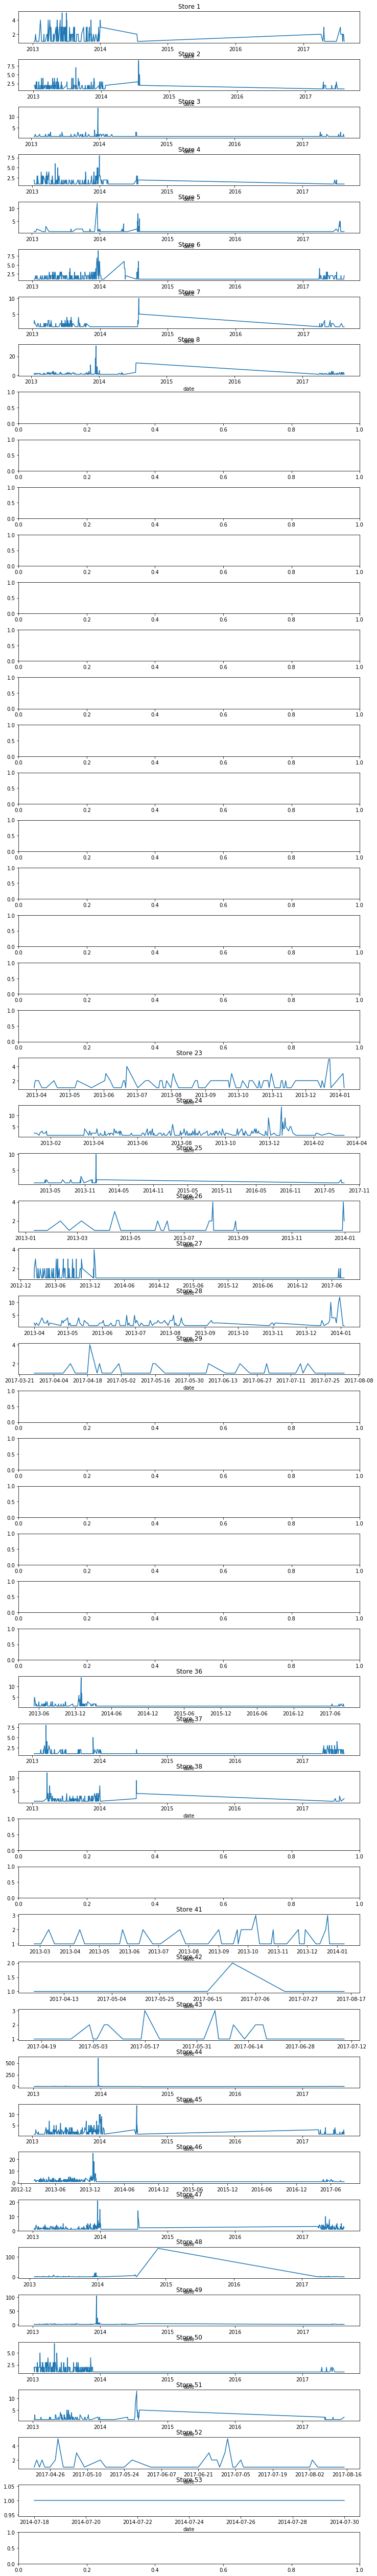

In [39]:
%pylab inline 

store = item_train_data.groupby('store_nbr')

figsize(10, 70)
fig, axes = plt.subplots(nrows = 54, ncols = 1)
fig.tight_layout()
for i in range(1,55):
    try:
        transactions_at_store = store.get_group(i)
        transactions_at_store['unit_sales'].plot(ax = axes[i - 1],  subplots = True)
        axes[i - 1].set_title('Store ' + str(i))
    except KeyError:
        pass
#store.get_group(4).plot(y = 'unit_sales')
#store.get_group(1)['date'].unique()
#store.get_group(1).to_csv('store_item.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\hassans\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


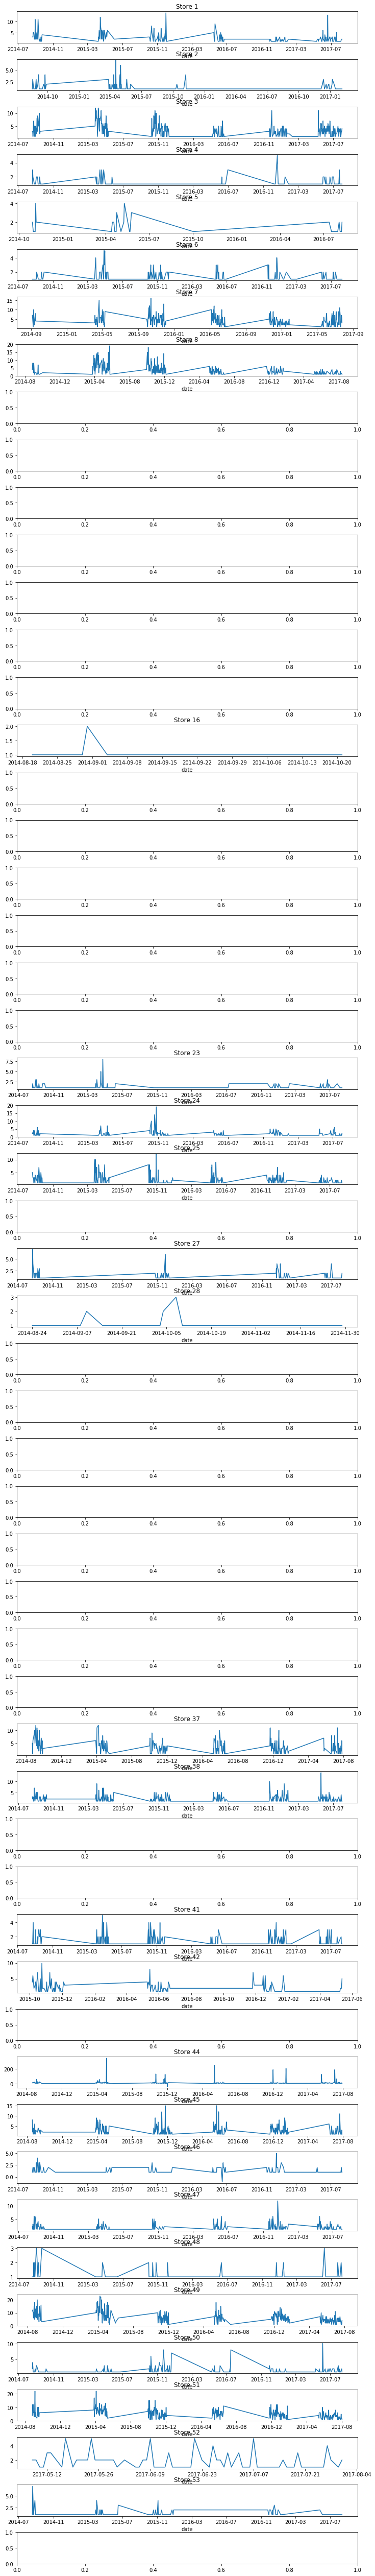

In [41]:
%pylab inline 

store = item_train_data.groupby('store_nbr')

figsize(10, 70)
fig, axes = plt.subplots(nrows = 54, ncols = 1)
fig.tight_layout()
for i in range(1,55):
    try:
        transactions_at_store = store.get_group(i)
        transactions_at_store['unit_sales'].plot(ax = axes[i - 1],  subplots = True)
        axes[i - 1].set_title('Store ' + str(i))
    except KeyError:
        pass
#store.get_group(4).plot(y = 'unit_sales')
#store.get_group(1)['date'].unique()
#store.get_group(1).to_csv('store_item.csv')

In [ ]:
store = item_train_data.groupby(['store_nbr', 'date'])
print(store.unique())
#store.get_group(1).plot(y = 'unit_sales', style = 'o')

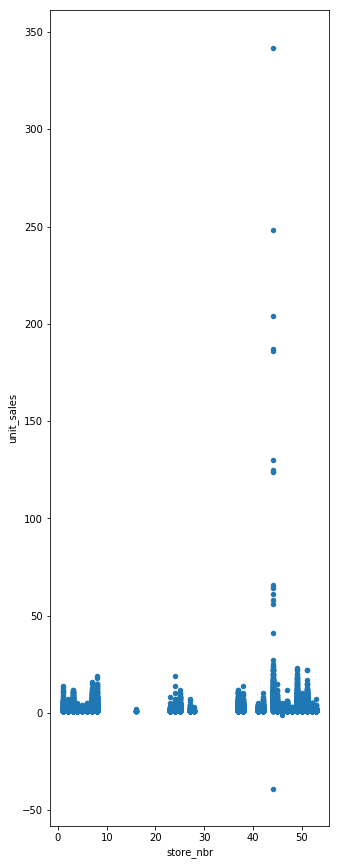

In [44]:
figsize(5, 15)
item_train_data.plot(x = 'store_nbr', y = 'unit_sales', kind = 'scatter')